In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Desktop/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
TARGET_COL = "test preparation course"

In [5]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
CAT_COLS = [
   'gender', 'race/ethnicity', 'parental level of education', 'lunch'
]

In [8]:
REAL_COLS = ['math score', 'reading score', 'writing score']

/Users/nnnkbrrr/opt/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nnnkbrrr/opt/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nnnkbrrr/opt/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

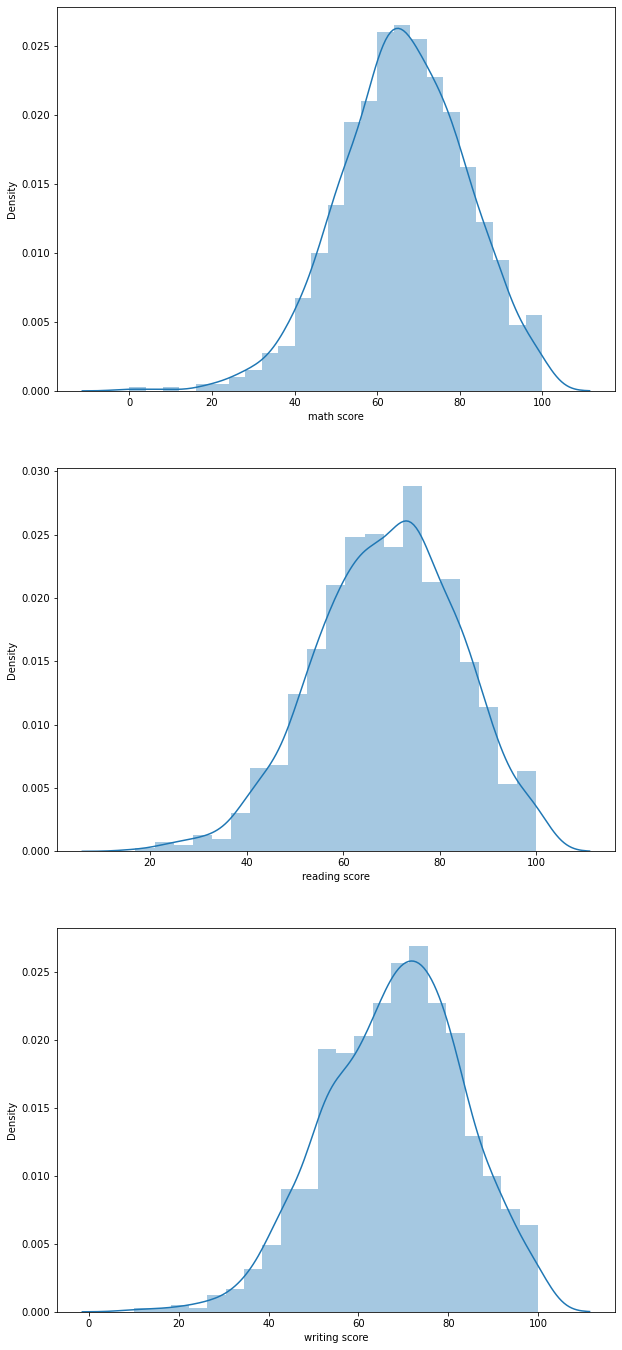

In [9]:
fig, ax = plt.subplots(3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.distplot(df[col], ax=ax[i])

In [10]:
len(CAT_COLS)

4

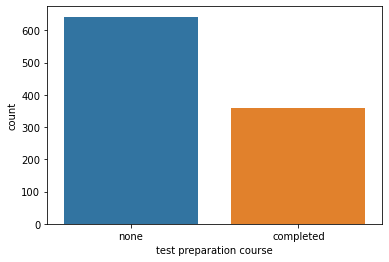

In [11]:
sns.countplot(x=TARGET_COL, data=df);

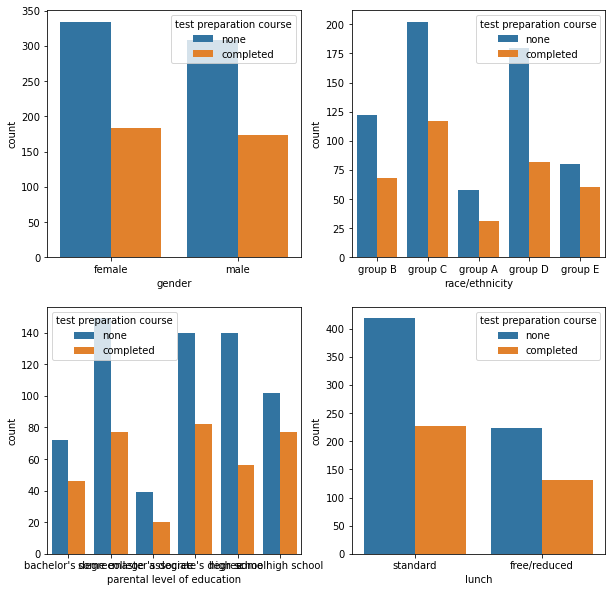

In [12]:
fig, ax = plt.subplots(2, 2);
fig.set_figwidth(10);
fig.set_figheight(10);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 2
    col_id = i % 2
    sns.countplot(x=col, hue=TARGET_COL, data=df, ax=ax[row_id, col_id])

In [13]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [14]:
condition = df["lunch"] == 'free/reduced'

In [15]:
data_size = df.shape[0]

In [16]:
df["test preparation course"].value_counts() / data_size

none         0.642
completed    0.358
Name: test preparation course, dtype: float64

In [17]:
condition_size = df.loc[condition].shape[0]
no_condition_size = df.loc[~condition].shape[0]

In [18]:
df.loc[condition, "test preparation course"].value_counts() / condition_size

none         0.630986
completed    0.369014
Name: test preparation course, dtype: float64

In [19]:
df.loc[~condition, "test preparation course"].value_counts() / no_condition_size

none         0.648062
completed    0.351938
Name: test preparation course, dtype: float64

In [20]:
lunchType = df.loc[condition]

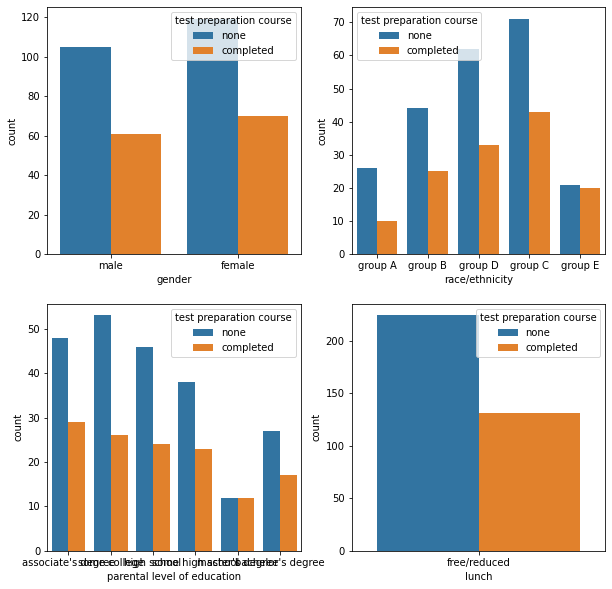

In [21]:
fig, ax = plt.subplots(2, 2);
fig.set_figwidth(10);
fig.set_figheight(10);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 2
    col_id = i % 2
    sns.countplot(x=col, hue=TARGET_COL, data=lunchType, ax=ax[row_id, col_id])

In [22]:
no_lunchType = df.loc[~condition]

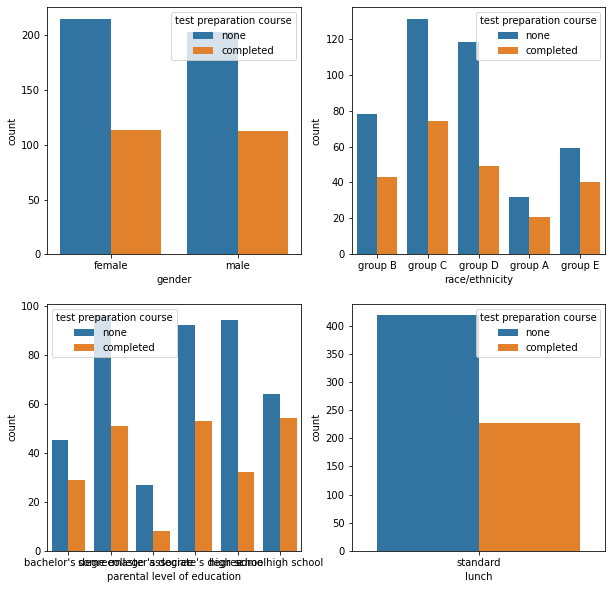

In [23]:
fig, ax = plt.subplots(2, 2);
fig.set_figwidth(10);
fig.set_figheight(10);
for i, col in enumerate(CAT_COLS):
    row_id  = i // 2
    col_id = i % 2
    sns.countplot(x=col, hue=TARGET_COL, data=no_lunchType, ax=ax[row_id, col_id])

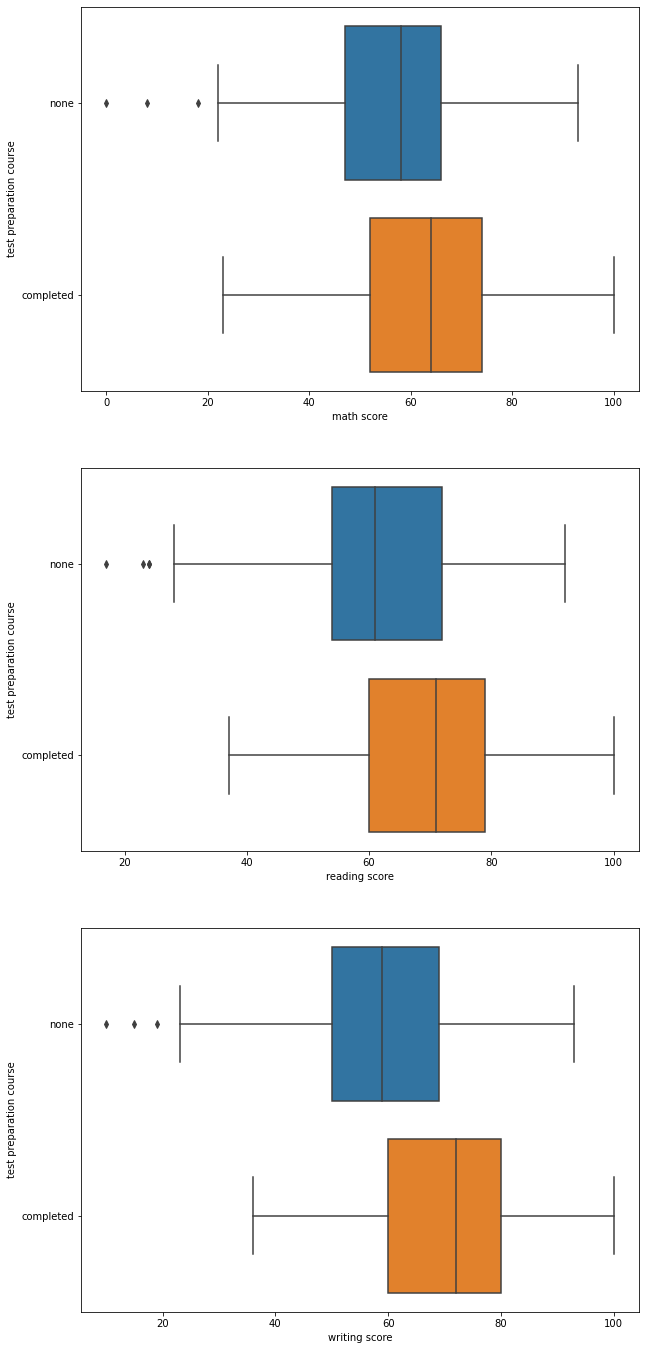

In [24]:
fig, ax = plt.subplots(3);
fig.set_figwidth(10);
fig.set_figheight(24);
for i, col in enumerate(REAL_COLS):
    sns.boxplot(x=col, y=TARGET_COL, data=lunchType, ax=ax[i], orient="h")

In [25]:
condition = lunchType["reading score"] > 60

In [26]:
condition_size = lunchType.loc[condition].shape[0]
no_condition_size = lunchType.loc[~condition].shape[0]

In [27]:
lunchType.loc[condition, "test preparation course"].value_counts() / condition_size

none         0.550926
completed    0.449074
Name: test preparation course, dtype: float64

In [28]:
lunchType.loc[~condition, "test preparation course"].value_counts() / no_condition_size

none         0.755396
completed    0.244604
Name: test preparation course, dtype: float64

In [30]:
lunchType["reading score_log"] = np.log1p(lunchType["reading score"])

/var/folders/tj/r6_57_h527x3_kxh197hhq7w0000gn/T/ipykernel_3740/251815961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunchType["reading score_log"] = np.log1p(lunchType["reading score"])


<AxesSubplot:xlabel='reading score_log', ylabel='test preparation course'>

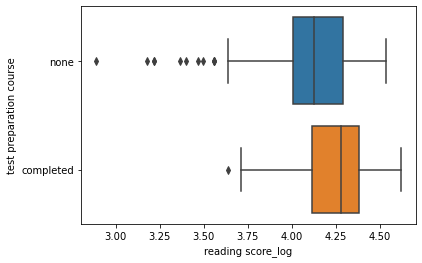

In [31]:
sns.boxplot(x="reading score_log", y=TARGET_COL, data=lunchType, orient="h")

In [34]:
condition = lunchType["reading score_log"] > 4.15

In [35]:
condition_size = lunchType.loc[condition].shape[0]
no_condition_size = lunchType.loc[~condition].shape[0]

In [36]:
lunchType.loc[condition, "test preparation course"].value_counts() / condition_size

none         0.528497
completed    0.471503
Name: test preparation course, dtype: float64

In [37]:
lunchType.loc[~condition, "test preparation course"].value_counts() / no_condition_size

none         0.753086
completed    0.246914
Name: test preparation course, dtype: float64

In [38]:
lunchType.loc[condition, "test preparation course"].value_counts()

none         102
completed     91
Name: test preparation course, dtype: int64

In [39]:
lunchType.loc[condition, "test preparation course"].value_counts() / df["test preparation course"].value_counts()

none         0.158879
completed    0.254190
Name: test preparation course, dtype: float64

In [40]:
df["reading score_log"] = np.log1p(df["reading score"])

In [43]:
df["Prediction"] = "none"
df.loc[(df["lunch"] == 'free/reduced') & (df["reading score_log"] > 4.15), "Prediction"] = "completed"

In [44]:
pd.crosstab(df["test preparation course"], df["Prediction"])

Prediction,completed,none
test preparation course,,
completed,91,267
none,102,540


In [45]:
df.loc[df["test preparation course"] == df["Prediction"]].shape[0] / data_size

0.631